In [17]:
#!pip install fuzzywuzzy chardet
#!pip install python-Levenshtein


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

- `fuzzywuzzy` is a library for string matching. It uses Levenshtein Distance to calculate the differences between sequences.
- `chardet` is a character encoding detection library. It helps in detecting the encoding of text data.

In [ ]:
#find out the encoding type of data
with open("PakistanSuicideAttacks Ver 6 (10-October-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [3]:
df = pd.read_csv('PakistanSuicideAttacks Ver 11 (30-November-2017).csv', encoding='Windows-1252')

#display max columns
pd.set_option('display.max_columns', None)

df.head()

In [6]:
#check the shape of the data
print(df.shape)

#check df columns
print(df.columns)

(496, 26)
Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')


let's drop the `S#` column from data as it is not useful

In [7]:
#drop S# column
df.drop(['S#'], axis=1, inplace=True)

# Data Preprocessing

In [8]:
#get the unique values in cities column
print(df['City'].nunique())
print('-'*10)
print(df['City'].unique())

93
----------
['Islamabad' 'Karachi' 'Karachi ' 'Quetta' 'Rawalpindi' 'North waziristan'
 'Kohat' 'Attock ' 'Sialkot' 'Lahore ' 'Swat' 'Hangu' 'Bannu'
 'North Waziristan' 'Lasbela' 'Malakand ' 'Peshawar' 'Peshawar '
 'D.I Khan ' 'Lakki Marwat' 'Tank' 'Islamabad ' 'Quetta ' 'Gujrat'
 'Charsadda' 'Tank ' 'Swat ' 'D.I Khan' 'Kohat ' 'Kuram Agency '
 'Shangla ' 'Bajaur Agency' 'South Waziristan' 'Haripur' 'bannu'
 'karachi ' 'Sargodha' 'Nowshehra' 'Charsadda ' 'Mohmand agency'
 'Dara Adam Khel' 'Khyber Agency' 'Mardan' 'Bhakkar ' 'Orakzai Agency'
 'Mohmand Agency' 'Buner' 'D.G Khan ' 'Pishin' 'Chakwal ' 'Lahore'
 'Upper Dir' 'Muzaffarabad' 'swat' 'Totalai' 'Multan' 'D.G Khan'
 'Lower Dir' 'Lakki marwat' 'Sudhanoti' 'Khyber Agency ' 'peshawar'
 'Poonch' 'Mansehra' 'Karak' 'Mohmand Agency ' 'South waziristan'
 'lakki marwat' 'Swabi ' 'Dara Adam khel' 'karachi' 'Shikarpur' 'Sukkur'
 'Chaman' 'D. I Khan' 'Khanewal' 'Fateh Jang' 'Taftan' 'Tirah Valley'
 'Wagah' 'Zhob' 'KURRAM AGENCY' 'ATTOCK' '

By looking at this I can see that their are inconsistencies in the data.
- first, I'm gonna turn the values in lowercase.
- second, I'm gonna remove any whitespaces present.

In [9]:
#convert the cities to lower case
df['City'] = df['City'].str.lower()
#remove whitespaces
df['City'] = df['City'].str.strip()

#let's see again the unique values in cities column
print(df['City'].nunique())
print('-'*30)
print(df['City'].unique())

67
------------------------------
['islamabad' 'karachi' 'quetta' 'rawalpindi' 'north waziristan' 'kohat'
 'attock' 'sialkot' 'lahore' 'swat' 'hangu' 'bannu' 'lasbela' 'malakand'
 'peshawar' 'd.i khan' 'lakki marwat' 'tank' 'gujrat' 'charsadda'
 'kuram agency' 'shangla' 'bajaur agency' 'south waziristan' 'haripur'
 'sargodha' 'nowshehra' 'mohmand agency' 'dara adam khel' 'khyber agency'
 'mardan' 'bhakkar' 'orakzai agency' 'buner' 'd.g khan' 'pishin' 'chakwal'
 'upper dir' 'muzaffarabad' 'totalai' 'multan' 'lower dir' 'sudhanoti'
 'poonch' 'mansehra' 'karak' 'swabi' 'shikarpur' 'sukkur' 'chaman'
 'd. i khan' 'khanewal' 'fateh jang' 'taftan' 'tirah valley' 'wagah'
 'zhob' 'kurram agency' 'taunsa' 'jacobabad' 'shabqadar-charsadda'
 'khuzdar' 'ghallanai, mohmand agency' 'hayatabad'
 'mosal kor, mohmand agency' 'sehwan town' 'tangi, charsadda district']


As a Pakistani we know that 'd.i khan' & 'd. i khan' is the same but those who don't know. I'm going to use the fuzzywuzzy package to help identify which string are closest to each other. 

- `Fuzzy matching`: The process of automatically finding text strings that are very similar to the target string. 
- Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "d.i khan".

In [10]:
#get the top-10 closest matches to 'd.i khan'
matches = fuzzywuzzy.process.extract('d.i khan', df['City'].unique(), limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('d.i khan', 100),
 ('d. i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47),
 ('kohat', 46),
 ('hangu', 46),
 ('dara adam khel', 45),
 ('mardan', 43),
 ('pishin', 43)]

we can see it has the match 100. so, we are gonna use `d.i khan`
- Now to remove this we can either make a function or use replace method. I've done both of them to practice.

In [11]:
# from each row replace the 'd. i khan' to 'd.i khan'
df['City'] = df['City'].replace('d. i khan', 'd.i khan')

#let's see again the unique values in city column
print(df['City'].nunique())
print('-'*30)
print(df['City'].unique())

66
------------------------------
['islamabad' 'karachi' 'quetta' 'rawalpindi' 'north waziristan' 'kohat'
 'attock' 'sialkot' 'lahore' 'swat' 'hangu' 'bannu' 'lasbela' 'malakand'
 'peshawar' 'd.i khan' 'lakki marwat' 'tank' 'gujrat' 'charsadda'
 'kuram agency' 'shangla' 'bajaur agency' 'south waziristan' 'haripur'
 'sargodha' 'nowshehra' 'mohmand agency' 'dara adam khel' 'khyber agency'
 'mardan' 'bhakkar' 'orakzai agency' 'buner' 'd.g khan' 'pishin' 'chakwal'
 'upper dir' 'muzaffarabad' 'totalai' 'multan' 'lower dir' 'sudhanoti'
 'poonch' 'mansehra' 'karak' 'swabi' 'shikarpur' 'sukkur' 'chaman'
 'khanewal' 'fateh jang' 'taftan' 'tirah valley' 'wagah' 'zhob'
 'kurram agency' 'taunsa' 'jacobabad' 'shabqadar-charsadda' 'khuzdar'
 'ghallanai, mohmand agency' 'hayatabad' 'mosal kor, mohmand agency'
 'sehwan town' 'tangi, charsadda district']


In [ ]:
#make afunction to replace 'd. i khan' with d.i khan
def replace_name(df, column, string_to_match, min_ratio=100):
    strings = df[column].unique()

    match_words = fuzzywuzzy.process.extract(string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [match[0] for match in match_words if match[1] >= min_ratio]
    
    matching_row = df[column].isin(close_matches)
    df.loc[matching_row, column] = string_to_match

#apply the function
replace_name(df=df, column='City', string_to_match='d.i khan' )

#let's see again the unique values in city column
print(df['City'].nunique())
print('-'*30)
print(df['City'].unique())

I have analysed each column and some columns needs to be preprocessed. You can check that from the data.

In [12]:
#replace baluchistan with balochistan and convert into lower case.
df['Province'] = df['Province'].replace('Baluchistan', 'Balochistan')
df['Province'] = df['Province'].str.lower()

# lower case the values of location category
df['Location Category'] = df['Location Category'].str.lower()

# turn the values into lower case
df['Target Type'] = df['Target Type'].str.lower()
#remove whitespaces
df['Target Type'] = df['Target Type'].str.strip()

# turn the values into lower case
df['Targeted Sect if any'] = df['Targeted Sect if any'].str.lower()

#replace the values with correct spellings
df['Holiday Type'] = df['Holiday Type'].replace('Christmas/ birthday of Quaid-e-Azam', 'Christmas/birthday of Quaid-e-Azam')
df['Holiday Type'] = df['Holiday Type'].replace('Ashura', 'Ashura Holiday')
df['Holiday Type'] = df['Holiday Type'].replace('Eid ul Azha Holiday', 'Eid-ul-azha')

#turn into lower case
df['Open/Closed Space'] = df['Open/Closed Space'].str.lower()
#remove whitespaces
df['Open/Closed Space'] = df['Open/Closed Space'].str.strip()

In [20]:
#convert the date column to datetime
df['Date/Time'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)

#make a new column name year
df['Year'] = df['Date/Time'].dt.year

#change the datatype to integer
df['Year'] = df['Year'].astype('Int64')

In [13]:
#remove the inconsistency present in the Injured Max Column
df['Injured Max'] = df['Injured Max'].replace('http://www.samaa.tv/pakistan/29-Jun-2015/shootout-after-suicide-attack-in-lahore', '')

In [14]:
# Fill null values in 'Injured Max' column with corresponding values from 'Injured Min' column
df['Injured Max'] = df['Injured Max'].fillna(df['Injured Min'])

In [15]:
#display null rows present in Injured Max column
null = df[df['Injured Max'].isnull()].reset_index()
null

,index,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,15,Thursday-April 28-2005,19 Raby` al-awal 1426 A.H,Working Day,NaN,NaN,swat,35.222700,72.4258,kpk,Baidara village of Matta-District Swat,park/ground,Low,open,NaN,civilian,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,19.935,67.883
1,31,Saturday-February 3-2007,15 MuHarram 1428 A.H.,Working Day,NaN,6:17:00 AM,lakki marwat,32.601800,70.9148,kpk,Ghazanikhel Market \nLaik marwat,market,Low,open,NaN,civilian,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,17.520,63.536
2,61,Saturday-September 1-2007,19 SHa`baan 1428 A.H,Working Day,NaN,NaN,south waziristan,32.320200,69.8597,fata,check-post of the troops in the Jandola area o...,military,High,closed,NaN,military,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,29.580,85.244
3,62,Tuesday-September 4-2007,22 SHa`baan 1428 A.H,Working Day,NaN,7:15:00 AM,rawalpindi,33.605800,73.0437,punjab,1.Qasim Market Defence Ministry Bus,mobile,High,open,NaN,military,NaN,18.0,25.0,NaN,NaN,2.0,NaN,1.District Headquarters Rwp\n2.Rwp General Hos...,27.150,80.870
4,63,Tuesday-September 4-2007,22 SHa`baan 1428 A.H,Working Day,NaN,7:15:00 AM,rawalpindi,33.605800,73.0437,punjab,Near R.A Bazar behind general Headquarters,market,Low,open,NaN,military,NaN,NaN,7.0,NaN,NaN,1.0,NaN,1.District Headquarters Rwp\n2.Rwp General Hos...,27.150,80.870
5,86,Tuesday-January 15-2008,6 MuHarram 1429 A.H,Working Day,NaN,10:30:00 AM,mohmand agency,32.974600,70.1456,fata,checkpoint of security forces in Khapakh Kando...,military,High,open,Frontier Constabulary,military,NaN,1.0,1.0,NaN,NaN,1.0,NaN,Ghalani hospital,5.145,41.261
6,138,Thursday-November 20-2008,22 Thw al-Qi`dah 1429 A.H.,Working Day,NaN,during maghrib prayer,bajaur agency,34.871800,71.5249,fata,Mosque in Badaan area of mamund,religious,Medium,closed,maghrib prayer,religious,sunni,NaN,9.0,NaN,NaN,1.0,NaN,District hospital Bajur,14.170,57.506
7,149,Thursday-February 5-2009,10 safar 1430 A.H.,Working Day,NaN,NaN,swat,35.383300,72.1833,kpk,near a Police station in the Mingora town of S...,police,High,open,NaN,police,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,9.435,48.983
8,153,Saturday-February 21-2009,26 safar 1430 A.H,Working Day,NaN,NaN,bannu,32.986100,70.6042,kpk,Lakki town,police,High,open,NaN,police,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,14.420,57.956
9,182,Wednesday-July 1-2009,8 Rajab 1430 A.H.,Working Day,NaN,NaN,peshawar,34.004300,71.5448,kpk,Mashokhel Mera Area-Kohat Road,mobile,High,open,NaN,unknown,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,30.385,86.693


In [16]:
#remove '+' symbol from the injured max column
df['Injured Max'] = df['Injured Max'].str.replace('100+', '100')
df['Injured Max'] = df['Injured Max'].str.replace('40+', '40')

# Replace empty strings with 0
df['Injured Max'] = df['Injured Max'].replace('', 0)

#fill other null values with 0
df['Injured Max'] = df['Injured Max'].fillna(0)

# Convert the column to integers
df['Injured Max'] = df['Injured Max'].astype('int64')

# EDA

## How many people got killed and injured per year?

In [122]:
# groupby df by killed max and year
peo_kill = df.groupby('Year')['Killed Max'].sum().reset_index().sort_values(by='Killed Max', ascending=False)
peo_kill

,Year,Killed Max
10,2010,1146.0
9,2009,1092.0
8,2008,940.0
7,2007,842.0
13,2013,660.0
11,2011,625.0
14,2014,383.0
12,2012,243.0
6,2006,161.0
15,2015,157.0


In [ ]:
#groupby df by injured max and year.
peo_injured = df.groupby('Year')['Injured Max'].sum().reset_index().sort_values(by='Injured Max', ascending=False)
peo_injured

,Year,Injured Max
9,2009,3462
10,2010,2939
8,2008,2426
7,2007,2008
13,2013,1607
11,2011,1386
12,2012,705
14,2014,652
4,2004,399
5,2005,230


In [19]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [21]:
#make barplot using plotly
fig = px.bar(df, x='Year', y='Killed Max', title='People Killed In Each Year Via Bomb Blasts In Pak',
            labels={'Killed Max': 'Number of Deaths', 'Year': 'Year', 'Location': 'Location'}, 
            color='Province',
            hover_data=['Province', 'City', 'Target Type'],
            color_continuous_scale=px.colors.sequential.Jet)
# Update layout for better visuals
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Deaths',
    legend_title='Province',
    title_font_size=20,
    title_x=0.5,
    xaxis_tickangle=-45
)

fig.show()

In [ ]:
import os
if not os.path.exists("images"):
    os.makedirs("images")
fig.write_image("images/killed_per_year_province.png")

- It shows that mostly people were killed in 2007, 2008, 2009, 2010 Suicide Blasts and mostly Blasts occured in KPK. 

In [22]:
# Create a bar chart with enhanced visuals
fig2 = px.bar(
    df, 
    x='Year', 
    y='Injured Max', 
    color='Province', 
    title='People Injured In Each Year Via Bomb Blasts In Pak',
    labels={'Injured Max': 'Number of Injuries', 'Year': 'Year', 'Location': 'Location'},
    hover_data=['Province', 'City', 'Target Type'],
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for better visuals
fig2.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Injuries',
    legend_title='Province',
    template='plotly_dark',
    title_font_size=20,
    title_x=0.5,
    xaxis_tickangle=-45
)

# Show the figure
fig2.show()

In [ ]:
import os
if not os.path.exists("images"):
    os.makedirs("images")
fig2.write_image("images/injured_per_year_province.png")

- It shows that the mostly people were injured in 2007, 2008, 2009, and 2010 attacks and most injuries are from KPK.

## Find out any correlation with suicide bombing attacks with influencing events given in the dataset

In [45]:
df.groupby('Influencing Event/Event')['No. of Suicide Blasts'].sum()

Influencing Event/Event
                                                                                                                                                                        1.0
 Attack on vehicle of Frontier Corps                                                                                                                                    1.0
 Punjab home minister Colonel (retd) Shuja Khanzada was killed in a suicide attack on his political office in Shadi Khan village Attock Sunday along with 16 others.    0.0
 a suicide attacker has detonated his explosive vest at the entrance of a Shiite neighborhood in southwestern Pakistan killing one security guard.                      0.0
 military convoy                                                                                                                                                        1.0
                                                                                                                    

In [50]:
# Aggregate the data by year to get the number of suicide blasts and the occurrence of influencing events
yearly_data = df.groupby('Year').agg({
    'No. of Suicide Blasts': 'sum',
    'Influencing Event/Event': 'count'  # Replace with the appropriate aggregation method for your data
}).reset_index()

# Calculate the correlation between the number of suicide blasts and the influencing events
correlation = yearly_data['No. of Suicide Blasts'].corr(yearly_data['Influencing Event/Event'])

print(f"Correlation between the number of suicide blasts and influencing events: {correlation}")

Correlation between the number of suicide blasts and influencing events: 0.5823099783124746


In [56]:
from sklearn.preprocessing import LabelEncoder

#encode the 'Influencing Event/Event' column using label encoder
le = LabelEncoder()
df['influ_encoded'] = le.fit_transform(df['Influencing Event/Event'])

In [57]:
# Calculate the correlation between the number of suicide blasts and the influencing events
correlation = df['No. of Suicide Blasts'].corr(df['influ_encoded'])

print(f"Correlation between the number of suicide blasts and influencing events: {correlation}")

Correlation between the number of suicide blasts and influencing events: 0.07537689245748558


## Find the names of hospitals sorted by number of victims

In [91]:
# Group by 'Hospital Names' and sum the 'Killed Max' and 'Injured Max' columns
hospital_stats = df.groupby('Hospital Names')[['Killed Max', 'Injured Max']].sum()

# Sort the results by 'Killed Max' and then by 'Injured Max' in ascending order
hospital_stats_sorted = hospital_stats.sort_values(by=['Killed Max', 'Injured Max'], ascending=False).head(10)

# Display the sorted DataFrame
print(hospital_stats_sorted)

                                                    Killed Max  Injured Max
Hospital Names                                                             
Lady Reading Hospital                                    299.0          665
Lady Reading Hospital \nPeshawar                         179.0          594
1.Jinnah Hospital \n2.Liaquat hospital                   145.0          550
pof hospital                                             100.0          200
LRH                                                      100.0          198
Near local hospital                                      100.0          100
Civil Hospital and the Combined Military Hospit...        93.0          121
Lady Reading Hospital Peshwar                             88.0          135
1.Kohat Dvisional Headquarters Hospital  2.Gahl...        85.0          200
Civil Hospital and the Combined Military Hospital         84.0          200


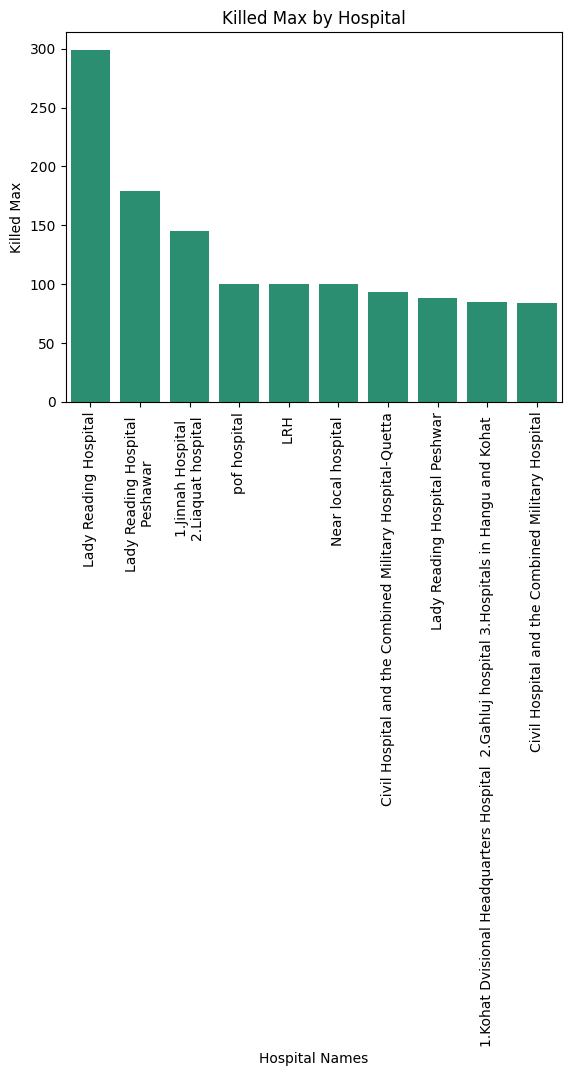

In [103]:
# Strip spaces from column names
hospital_stats_sorted.columns = hospital_stats_sorted.columns.str.strip()

# Plot the barplot
sns.set_palette('Dark2')
sns.barplot(data=hospital_stats_sorted, x='Hospital Names', y='Killed Max')
plt.title('Killed Max by Hospital')

plt.xticks(rotation=90)
import os
if not os.path.exists("images"):
    os.makedirs("images")
plt.savefig("images/killed_max_by_hospital.png", bbox_inches='tight')
plt.show()


In [115]:
# Reset the index to make 'Hospital Names' a column
hospital_stats_sorted 

# Create the bar plot using Plotly
fig4 = px.bar(
    hospital_stats_sorted, 
    x='Hospital Names', 
    y='Injured Max', 
    title='Number of People Killed by Hospital',
    labels={'Killed Max': 'Number of People Killed', 'Hospital Names': 'Hospital Names',
            'Injured Max': 'Number of Injureds'},
    color='Killed Max',  # Color bars by the number of people killed
    color_continuous_scale='Viridis'  # Use the Viridis color scale
)

# Update layout for better visuals
fig4.update_layout(
    xaxis_title='Hospital Names',
    yaxis_title='Number of People Killed',
    title_font_size=20,
    title_x=0.5,
    xaxis_tickangle=90  # Rotate x-axis labels for better readability
)

# Show the figure
fig4.show()

In [ ]:
import os
if not os.path.exists("images"):
    os.makedirs("images")
fig4.write_image("images/injured_killed_by_hospital.png")

## Find the Top 10 locations of blasts

In [82]:
df.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),Date/Time,Year,influ_encoded
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,islamabad,33.7180,73.0718,capital,Egyptian Embassy,foreign,High,closed,NaN,foreigner,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503,1995-11-19,1995,173
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,karachi,24.9918,66.9911,sindh,office of Nawa-e-Waqt,office building,Low,closed,NaN,media,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786,2000-11-06,2000,173
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,karachi,24.9918,66.9911,sindh,Pakistan Navy bus Parked outside Five Star She...,hotel,Medium,closed,NaN,foreigner,christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628,2002-05-08,2002,173
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,karachi,24.9918,66.9911,sindh,US Consulate Civil Lines Area,foreign,High,closed,NaN,foreigner,christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574,2002-06-14,2002,173
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,quetta,30.2095,67.0182,balochistan,Imambargah MeCongy Road Quetta,religious,Medium,closed,during Friday prayer,religious,shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616,2003-07-04,2003,137


In [84]:
df['Location'].nunique()

487

In [116]:
top10_suicide = df.groupby('Location')['No. of Suicide Blasts'].sum().sort_values(ascending=False).reset_index().head(10)
top10_suicide

,Location,No. of Suicide Blasts
0,FC Check Post,4.0
1,Maryan police station in Frontier Region Bannu,4.0
2,1)First blast lower mal gate 2)Ghaznavi street...,3.0
3,District police officer's office,3.0
4,C-Division Police Station (Kotwali police Stat...,3.0
5,Parachinar town in the restive tribal bel,3.0
6,ANP rally in Timergara,3.0
7,FC headquarters in Shabqadar-30km from peshawar,2.0
8,Wah Cant Pakistn Ordinance Factories,2.0
9,FC DIG's residence at Anscumb road,2.0


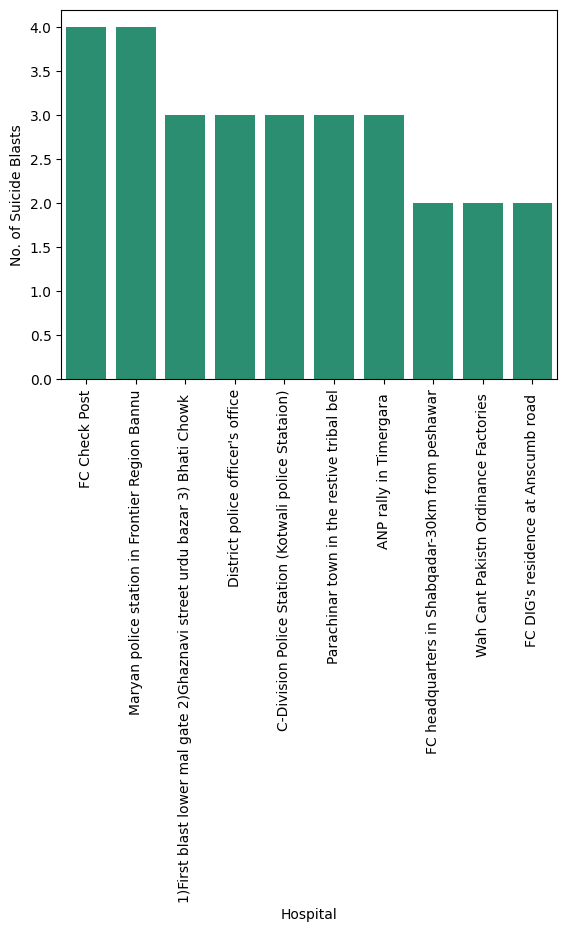

In [122]:
sns.color_palette('Set2')
sns.barplot(top10_suicide, x='Location', y='No. of Suicide Blasts')
plt.xlabel('Hospital')
plt.ylabel('No. of Suicide Blasts')
plt.xticks(rotation=90)
import os
if not os.path.exists("images"):
    os.makedirs("images")
plt.savefig("images/blasts_by_location.png", bbox_inches='tight')
plt.show()